In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
# Load the dataset
data = pd.read_csv('C:/Users/Luwei Li/Desktop/IS525/IS525-Final-Project/Chicago_Energy_Benchmarking_-_2021_Data_Reported_in_2022.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID,Wards,Community Areas,Zip Codes,Census Tracts,Historical Wards 2003-2015
0,2021,251380,Motley School Apartments,Exempt,739 N Ada St,60642,NaN,True,WEST TOWN,K-12 School,...,NaN,41.895488,-87.661111,POINT (-87.66111127 41.8954882),2021-251380,46,25,22620,521,41
1,2021,256826,NaN,Not Submitted,1201 W Lake Street,NaN,0.0,False,NaN,NaN,...,NaN,41.884250,-87.632450,POINT (-87.63245 41.88425),2021-256826,36,38,14310,92,22
2,2021,103314,Evergreen Tower,Not Submitted,1333 N CLEVELAND AVE,60610,0.0,False,NEAR NORTH SIDE,NaN,...,NaN,41.903753,-87.635588,POINT (-87.63558845 41.9037528),2021-103314,46,37,14926,148,41
3,2021,172547,NaN,Exempt,2222 S MICHIGAN AVE,60616,NaN,True,NEAR SOUTH SIDE,NaN,...,NaN,41.852150,-87.624645,POINT (-87.62464535 41.85215031),2021-172547,9,34,21194,193,48
4,2021,251575,"Delano Elementary, Edward C -CPS",Exempt,3937 W Wilcox St,60624,NaN,True,WEST GARFIELD PARK,K-12 School,...,NaN,41.878376,-87.724345,POINT (-87.72434523 41.87837616),2021-251575,23,27,21572,736,11


In [15]:
# Identify columns with missing values and their counts
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values

All Other Fuel Use (kBtu)                     3550
Water Use (kGal)                              3550
ENERGY STAR Score                             1309
Weather Normalized Source EUI (kBtu/sq ft)     997
Weather Normalized Site EUI (kBtu/sq ft)       997
GHG Intensity (kg CO2e/sq ft)                  991
Total GHG Emissions (Metric Tons CO2e)         991
Source EUI (kBtu/sq ft)                        974
Site EUI (kBtu/sq ft)                          974
District Steam Use (kBtu)                      855
District Chilled Water Use (kBtu)              855
Electricity Use (kBtu)                         855
Natural Gas Use (kBtu)                         855
# of Buildings                                 526
Year Built                                     526
Primary Property Type                          526
Property Name                                  331
Chicago Energy Rating                          296
Community Area                                  78
ZIP Code                       

In [17]:
# Drop columns with a high percentage of missing values
threshold = 0.5 * len(data)  # Columns with more than 50% missing values
data_cleaned = data.drop(columns=missing_values[missing_values > threshold].index.tolist())

# Impute numeric columns with median
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    median_value = data_cleaned[column].median()
    data_cleaned[column].fillna(median_value, inplace=True)

# Fill categorical columns with 'Unknown' or mode
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
for column in categorical_columns:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna('Unknown', inplace=True)

# Check if there are any missing values left
remaining_missing_values = data_cleaned.isnull().sum().sum()

data_cleaned

,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID,Wards,Community Areas,Zip Codes,Census Tracts,Historical Wards 2003-2015
0,2021,251380,Motley School Apartments,Exempt,739 N Ada St,60642,2.5,True,WEST TOWN,K-12 School,...,6.5,41.895488,-87.661111,POINT (-87.66111127 41.8954882),2021-251380,46,25,22620,521,41
1,2021,256826,Unknown,Not Submitted,1201 W Lake Street,Unknown,0.0,False,Unknown,Unknown,...,6.5,41.884250,-87.632450,POINT (-87.63245 41.88425),2021-256826,36,38,14310,92,22
2,2021,103314,Evergreen Tower,Not Submitted,1333 N CLEVELAND AVE,60610,0.0,False,NEAR NORTH SIDE,Unknown,...,6.5,41.903753,-87.635588,POINT (-87.63558845 41.9037528),2021-103314,46,37,14926,148,41
3,2021,172547,Unknown,Exempt,2222 S MICHIGAN AVE,60616,2.5,True,NEAR SOUTH SIDE,Unknown,...,6.5,41.852150,-87.624645,POINT (-87.62464535 41.85215031),2021-172547,9,34,21194,193,48
4,2021,251575,"Delano Elementary, Edward C -CPS",Exempt,3937 W Wilcox St,60624,2.5,True,WEST GARFIELD PARK,K-12 School,...,6.5,41.878376,-87.724345,POINT (-87.72434523 41.87837616),2021-251575,23,27,21572,736,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,2021,142211,642 W. Addison Apartments,Submitted,630 644 W ADDISON ST,60613,3.5,False,LAKE VIEW,Multifamily Housing,...,5.8,41.954020,-87.662028,POINT (-87.6620278 41.95402016),2021-142211,18,57,21186,725,13
3546,2021,161872,Parkside Elementary Academy -CPS,Exempt,6938 S E End Ave,60649,2.5,True,SOUTH SHORE,K-12 School,...,6.5,41.768909,-87.583306,POINT (-87.5833058 41.7689093),2021-161872,33,39,22538,381,32
3547,2021,175818,Hotel Lincoln,Not Submitted,1816 N CLARK ST,60614,0.0,False,LINCOLN PARK,Unknown,...,6.5,41.922011,-87.654620,POINT (-87.65461957 41.92201051),2021-175818,34,68,21190,797,16
3548,2021,135716,"CP2, LLC",Submitted,225 W Hubbard St,60654,2.0,False,NEAR NORTH SIDE,Other,...,7.2,41.889943,-87.635300,POINT (-87.63529975 41.88994335),2021-135716,36,37,4446,652,22


In [18]:
# Function to compute lower and upper bounds for potential outliers
def compute_iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Identify outliers for each numeric column
outliers_dict = {}
for column in numeric_columns:
    lower_bound, upper_bound = compute_iqr_bounds(data_cleaned[column])
    outliers = data_cleaned[(data_cleaned[column] < lower_bound) | (data_cleaned[column] > upper_bound)]
    outliers_dict[column] = len(outliers)

outliers_count = pd.Series(outliers_dict).sort_values(ascending=False)

outliers_count

Zip Codes                                     604
Community Areas                               580
GHG Intensity (kg CO2e/sq ft)                 497
Source EUI (kBtu/sq ft)                       462
Weather Normalized Source EUI (kBtu/sq ft)    457
Total GHG Emissions (Metric Tons CO2e)        444
Natural Gas Use (kBtu)                        441
Electricity Use (kBtu)                        413
Site EUI (kBtu/sq ft)                         375
# of Buildings                                367
Weather Normalized Site EUI (kBtu/sq ft)      366
Gross Floor Area - Buildings (sq ft)          360
ENERGY STAR Score                             335
Longitude                                     298
Latitude                                      162
District Chilled Water Use (kBtu)              95
District Steam Use (kBtu)                      66
Wards                                           0
Census Tracts                                   0
Data Year                                       0


In [20]:
# Cap/Floor the outliers for each numeric column
for column in numeric_columns:
    lower_bound, upper_bound = compute_iqr_bounds(data_cleaned[column])
    data_cleaned[column] = data_cleaned[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Check the number of outliers after capping/flooring
outliers_post_process = {}
for column in numeric_columns:
    lower_bound, upper_bound = compute_iqr_bounds(data_cleaned[column])
    outliers = data_cleaned[(data_cleaned[column] < lower_bound) | (data_cleaned[column] > upper_bound)]
    outliers_post_process[column] = len(outliers)

outliers_count_post_process = pd.Series(outliers_post_process).sort_values(ascending=False)

outliers_count_post_process

Data Year                                     0
ID                                            0
Census Tracts                                 0
Zip Codes                                     0
Community Areas                               0
Wards                                         0
Longitude                                     0
Latitude                                      0
GHG Intensity (kg CO2e/sq ft)                 0
Total GHG Emissions (Metric Tons CO2e)        0
Weather Normalized Source EUI (kBtu/sq ft)    0
Weather Normalized Site EUI (kBtu/sq ft)      0
Source EUI (kBtu/sq ft)                       0
Site EUI (kBtu/sq ft)                         0
District Chilled Water Use (kBtu)             0
District Steam Use (kBtu)                     0
Natural Gas Use (kBtu)                        0
Electricity Use (kBtu)                        0
ENERGY STAR Score                             0
# of Buildings                                0
Year Built                              

In [21]:
# Display the data types of each column
data_types = data_cleaned.dtypes

data_types

Data Year                                       int64
ID                                              int64
Property Name                                  object
Reporting Status                               object
Address                                        object
ZIP Code                                       object
Chicago Energy Rating                         float64
Exempt From Chicago Energy Rating                bool
Community Area                                 object
Primary Property Type                          object
Gross Floor Area - Buildings (sq ft)          float64
Year Built                                    float64
# of Buildings                                float64
ENERGY STAR Score                             float64
Electricity Use (kBtu)                        float64
Natural Gas Use (kBtu)                        float64
District Steam Use (kBtu)                     float64
District Chilled Water Use (kBtu)             float64
Site EUI (kBtu/sq ft)       

In [22]:
# Convert specified columns to categorical (string) data type
categorical_cols = ['ZIP Code', 'Wards', 'Community Areas', 'Zip Codes', 'Census Tracts', 'Historical Wards 2003-2015']
data_cleaned[categorical_cols] = data_cleaned[categorical_cols].astype(str)

# Convert 'Year Built' to integer
data_cleaned['Year Built'] = data_cleaned['Year Built'].astype(int)

# Verify the data type conversions
converted_data_types = data_cleaned.dtypes[categorical_cols + ['Year Built']]

converted_data_types

ZIP Code                      object
Wards                         object
Community Areas               object
Zip Codes                     object
Census Tracts                 object
Historical Wards 2003-2015    object
Year Built                     int32
dtype: object

# dataframe before standardize

In [24]:
data_cleaned

,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID,Wards,Community Areas,Zip Codes,Census Tracts,Historical Wards 2003-2015
0,2021,251380,Motley School Apartments,Exempt,739 N Ada St,60642,2.5,True,WEST TOWN,K-12 School,...,6.5,41.895488,-87.661111,POINT (-87.66111127 41.8954882),2021-251380,46,25.0,22620.0,521,41
1,2021,256826,Unknown,Not Submitted,1201 W Lake Street,Unknown,0.0,False,Unknown,Unknown,...,6.5,41.884250,-87.632450,POINT (-87.63245 41.88425),2021-256826,36,38.0,14310.0,92,22
2,2021,103314,Evergreen Tower,Not Submitted,1333 N CLEVELAND AVE,60610,0.0,False,NEAR NORTH SIDE,Unknown,...,6.5,41.903753,-87.635588,POINT (-87.63558845 41.9037528),2021-103314,46,37.0,14926.0,148,41
3,2021,172547,Unknown,Exempt,2222 S MICHIGAN AVE,60616,2.5,True,NEAR SOUTH SIDE,Unknown,...,6.5,41.852150,-87.624645,POINT (-87.62464535 41.85215031),2021-172547,9,34.0,21194.0,193,48
4,2021,251575,"Delano Elementary, Edward C -CPS",Exempt,3937 W Wilcox St,60624,2.5,True,WEST GARFIELD PARK,K-12 School,...,6.5,41.878376,-87.724345,POINT (-87.72434523 41.87837616),2021-251575,23,27.0,21572.0,736,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,2021,142211,642 W. Addison Apartments,Submitted,630 644 W ADDISON ST,60613,3.5,False,LAKE VIEW,Multifamily Housing,...,5.8,41.954020,-87.662028,POINT (-87.6620278 41.95402016),2021-142211,18,57.0,21186.0,725,13
3546,2021,161872,Parkside Elementary Academy -CPS,Exempt,6938 S E End Ave,60649,2.5,True,SOUTH SHORE,K-12 School,...,6.5,41.768909,-87.583306,POINT (-87.5833058 41.7689093),2021-161872,33,39.0,22538.0,381,32
3547,2021,175818,Hotel Lincoln,Not Submitted,1816 N CLARK ST,60614,0.0,False,LINCOLN PARK,Unknown,...,6.5,41.922011,-87.654620,POINT (-87.65461957 41.92201051),2021-175818,34,61.0,21190.0,797,16
3548,2021,135716,"CP2, LLC",Submitted,225 W Hubbard St,60654,2.0,False,NEAR NORTH SIDE,Other,...,7.2,41.889943,-87.635300,POINT (-87.63529975 41.88994335),2021-135716,36,37.0,4509.0,652,22


In [11]:
# Identify numeric columns for standardization
numeric_columns_to_standardize = data_cleaned.select_dtypes(include=['float64']).columns

# Standardize the numeric columns
scaler = StandardScaler()
data_cleaned[numeric_columns_to_standardize] = scaler.fit_transform(data_cleaned[numeric_columns_to_standardize])

# Display the first few rows after standardization
data_cleaned

,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID,Wards,Community Areas,Zip Codes,Census Tracts,Historical Wards 2003-2015
0,2021,251380,Motley School Apartments,Exempt,739 N Ada St,60642,0.156720,True,WEST TOWN,K-12 School,...,-0.080343,0.176147,-0.269094,POINT (-87.66111127 41.8954882),2021-251380,46,25.0,22620.0,521,41
1,2021,256826,Unknown,Not Submitted,1201 W Lake Street,Unknown,-1.520061,False,Unknown,Unknown,...,-0.080343,0.006817,0.484704,POINT (-87.63245 41.88425),2021-256826,36,38.0,14310.0,92,22
2,2021,103314,Evergreen Tower,Not Submitted,1333 N CLEVELAND AVE,60610,-1.520061,False,NEAR NORTH SIDE,Unknown,...,-0.080343,0.300673,0.402162,POINT (-87.63558845 41.9037528),2021-103314,46,37.0,14926.0,148,41
3,2021,172547,Unknown,Exempt,2222 S MICHIGAN AVE,60616,0.156720,True,NEAR SOUTH SIDE,Unknown,...,-0.080343,-0.476842,0.689967,POINT (-87.62464535 41.85215031),2021-172547,9,34.0,21194.0,193,48
4,2021,251575,"Delano Elementary, Edward C -CPS",Exempt,3937 W Wilcox St,60624,0.156720,True,WEST GARFIELD PARK,K-12 School,...,-0.080343,-0.081687,-1.932160,POINT (-87.72434523 41.87837616),2021-251575,23,27.0,21572.0,736,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,2021,142211,642 W. Addison Apartments,Submitted,630 644 W ADDISON ST,60613,0.827432,False,LAKE VIEW,Multifamily Housing,...,-0.477859,1.058072,-0.293199,POINT (-87.6620278 41.95402016),2021-142211,18,57.0,21186.0,725,13
3546,2021,161872,Parkside Elementary Academy -CPS,Exempt,6938 S E End Ave,60649,0.156720,True,SOUTH SHORE,K-12 School,...,-0.080343,-1.731068,1.777206,POINT (-87.5833058 41.7689093),2021-161872,33,39.0,22538.0,381,32
3547,2021,175818,Hotel Lincoln,Not Submitted,1816 N CLARK ST,60614,-1.520061,False,LINCOLN PARK,Unknown,...,-0.080343,0.575770,-0.098361,POINT (-87.65461957 41.92201051),2021-175818,34,61.0,21190.0,797,16
3548,2021,135716,"CP2, LLC",Submitted,225 W Hubbard St,60654,-0.178636,False,NEAR NORTH SIDE,Other,...,0.317173,0.092601,0.409755,POINT (-87.63529975 41.88994335),2021-135716,36,37.0,4509.0,652,22


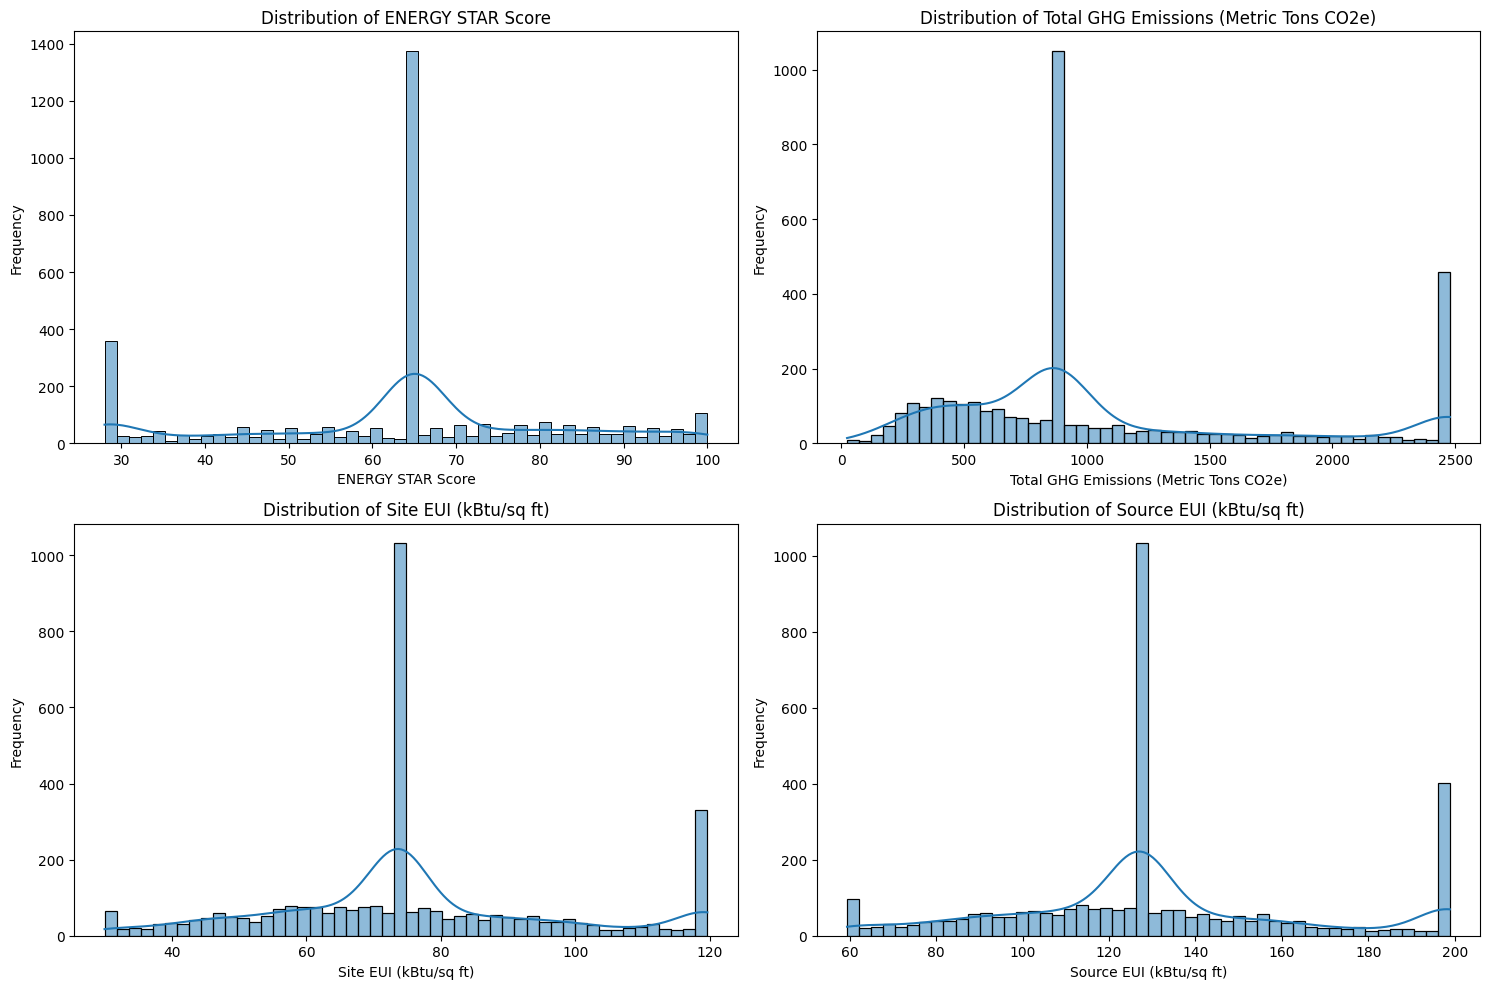

In [25]:


# List of key columns for EDA
key_columns = ['ENERGY STAR Score', 'Total GHG Emissions (Metric Tons CO2e)', 'Site EUI (kBtu/sq ft)', 'Source EUI (kBtu/sq ft)']

# Plot histograms for these columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(key_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_cleaned[column], bins=50, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()


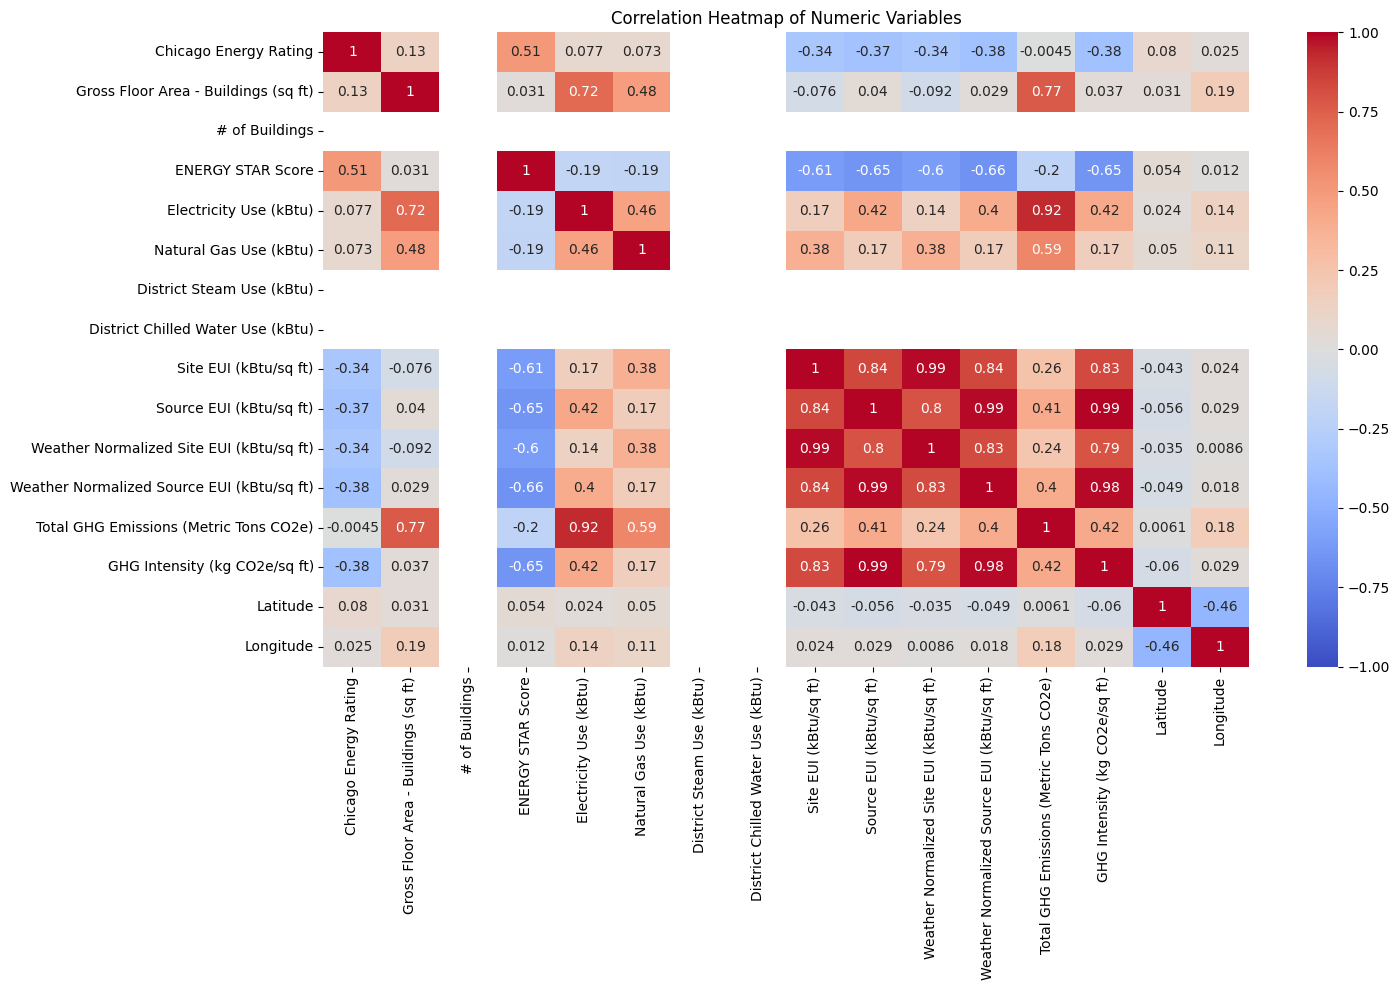

In [26]:
# Compute the correlation matrix
correlation_matrix = data_cleaned[numeric_columns_to_standardize].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

In [27]:
# Create interaction term
data_cleaned['Electricity_NaturalGas_Interaction'] = data_cleaned['Electricity Use (kBtu)'] * data_cleaned['Natural Gas Use (kBtu)']

# Standardize the new interaction term
data_cleaned['Electricity_NaturalGas_Interaction'] = scaler.fit_transform(data_cleaned[['Electricity_NaturalGas_Interaction']])

# Display the first few rows after creating the interaction term
data_cleaned[['Electricity Use (kBtu)', 'Natural Gas Use (kBtu)', 'Electricity_NaturalGas_Interaction']].head()


,Electricity Use (kBtu),Natural Gas Use (kBtu),Electricity_NaturalGas_Interaction
0,3458379.3,4928420.2,-0.359959
1,3458379.3,4928420.2,-0.359959
2,3458379.3,4928420.2,-0.359959
3,3458379.3,4928420.2,-0.359959
4,3458379.3,4928420.2,-0.359959


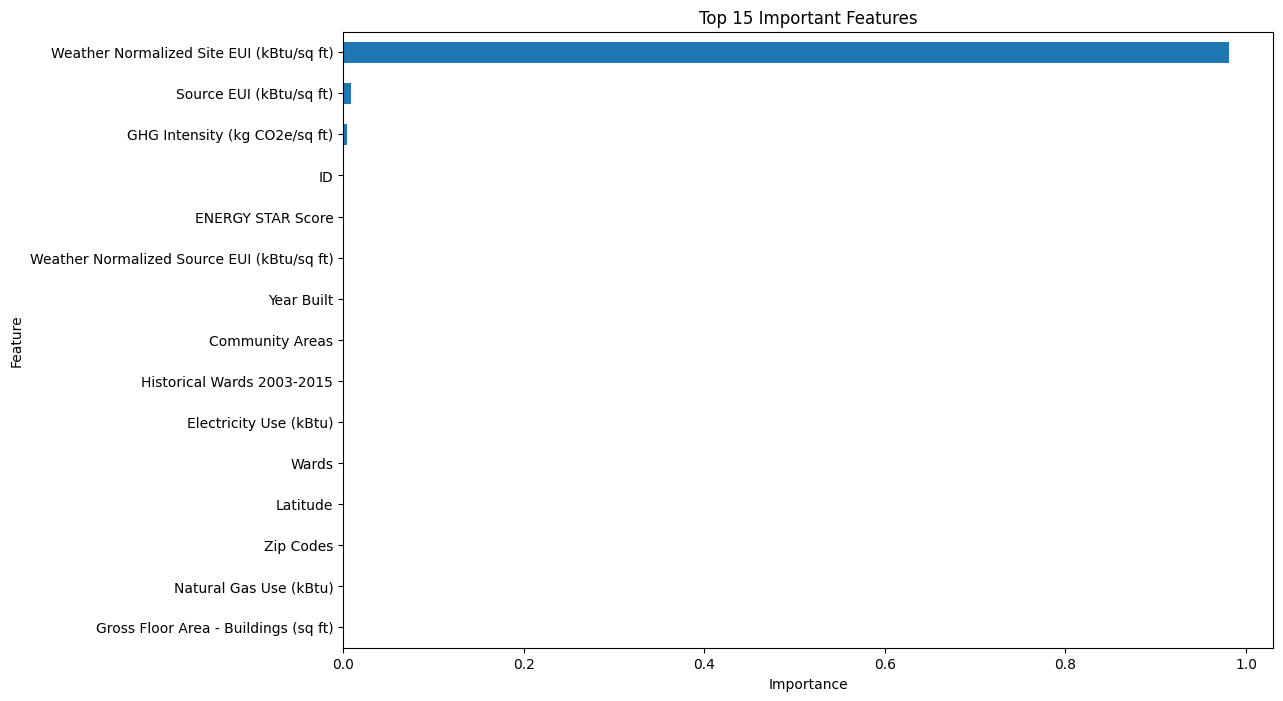

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data for model training
X = data_cleaned.drop(columns=['Site EUI (kBtu/sq ft)', 'Property Name', 'Reporting Status', 'Address', 'ZIP Code', 'Community Area', 'Primary Property Type', 'Location', 'Row_ID'])
y = data_cleaned['Site EUI (kBtu/sq ft)']

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the top 15 features
plt.figure(figsize=(12, 8))
feature_importances.head(15).plot(kind='barh')
plt.title('Top 15 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((2840, 25), (710, 25))

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the testing set
lr_predictions = lr_model.predict(X_test)

# Compute the MAE for Linear Regression
lr_mae = mean_absolute_error(y_test, lr_predictions)

lr_mae


0.6210740360932123

In [31]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the testing set
rf_predictions = rf_model.predict(X_test)

# Compute the MAE for Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)

rf_mae


0.6995507042254041

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the testing set
gb_predictions = gb_model.predict(X_test)

# Compute the MAE for Gradient Boosting
gb_mae = mean_absolute_error(y_test, gb_predictions)

gb_mae


0.7361647920449501

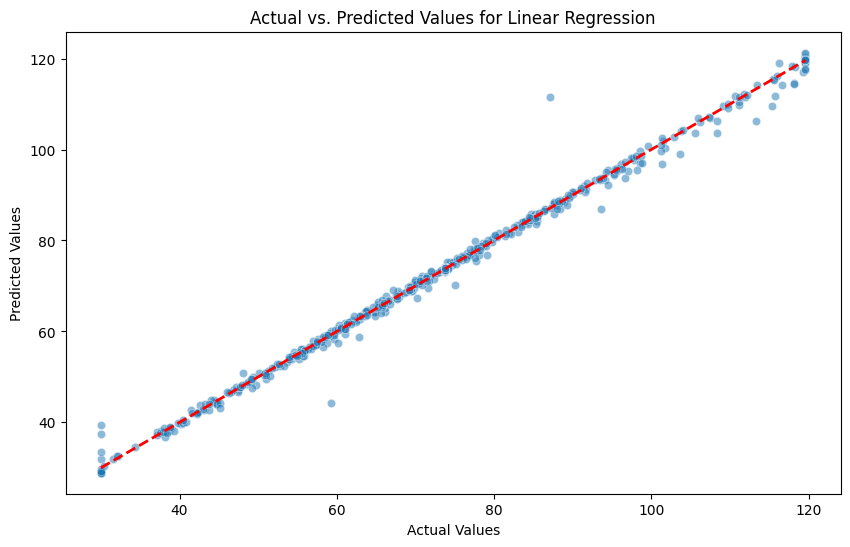

In [36]:
# Corrected plot for Actual vs. Predicted values for Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=lr_predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Linear Regression')
plt.show()

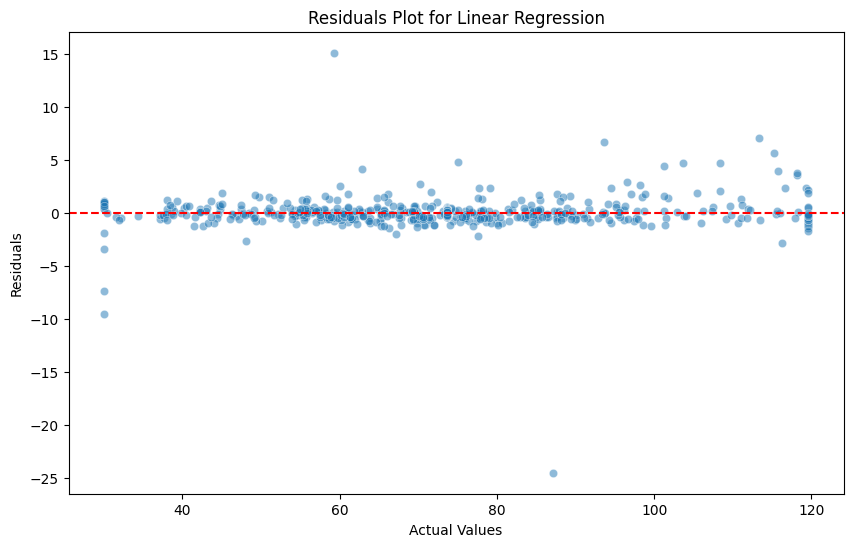

In [37]:
# Compute residuals for Linear Regression
lr_residuals = y_test - lr_predictions

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=lr_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Linear Regression')
plt.show()


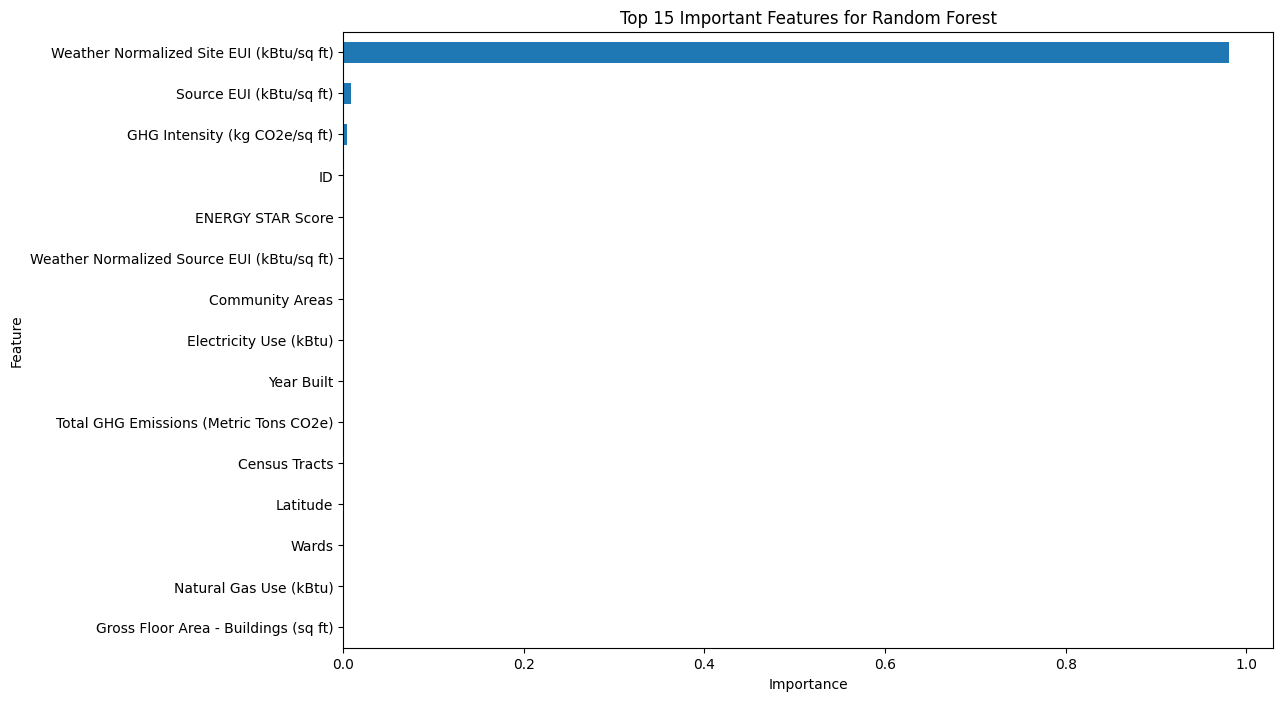

In [35]:
# Get feature importances for Random Forest model
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the top 15 features
plt.figure(figsize=(12, 8))
rf_feature_importances.head(15).plot(kind='barh')
plt.title('Top 15 Important Features for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()
